In [4]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

## Systems of Linear Equations

In this chapter, you'll be able to use what you learned about vectors and matrices, and linear combinations. This will allow you to convert data into systems of linear equations. At the end of the chapter, you'll see how you can use systems of linear equations and linear algebra to solve a lienar regression problem. 

Linear equations are formalizations of the relationship between variables. Take the example of linear relationship between two variables x and y define by the following equation: 
$$
y = 2x + 1
$$
You can represent this relationship in a Cartesian plane:

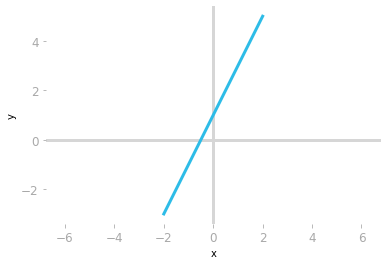

In [3]:
# create x and y vectors 
x = np.linspace(-2, 2, 100)
y = 2 * x + 1
plt.plot(x, y)

# [...] Add axes and styles 
, zorder = 0 

# Assure that ticks are displayed with a specific step 
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes 
plt.axhline(0, c='#d6d6d6', zorder = 0)
plt.axvline(0, c='#d6d6d6', zorder = 0)

# assure x and y axis have the same scale
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Plot of the equation y = 2x + 1

Remember that each point on the line corresponds to a solution of this equation: if you replace x and y with the coordinates of a point on the line in this equation, the equality is satisfied. This means that there is an infinite number of solutions (every point in the line). 

It is also possible to consider more than one linear equation using the same variables: this is a system of equations. 

### 4.1 System of linear equations
A system of equation is a set of equations describing the relationship between variables. 

$$
\begin{cases}
y = 2x + 1\\\\
y = -0.5x + 3
\end{cases}
$$

You have two linear equations and they both characterize the relationship between the variable x and y. This is a system with two equations and two variables (also called unknowns in this context). 

You can consider systems of linear equations (each row of the system) as multiple equations, each corresponding to a line. This is called a row picture. 

You can also consider the system as different columns corresponding to coefficients scaling the variables. This is caleld the column picture. 

#### 4.1.1 Row Picture 
With the row picture, each row of the system corresponds to an equation. In the previous example, there are two equations describing the relationship between two variables x and y. 

##### Graphical Representation of the Row Picture
Let's represent the two equations graphically: 

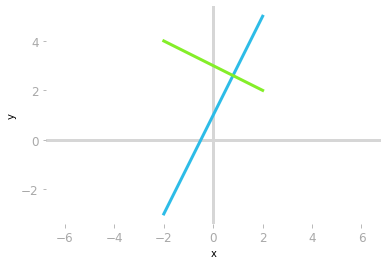

In [4]:
# create x and y vectors 
x = np.linspace(-2, 2, 100)
y = 2*x + 1
y1 = -0.5*x + 3
plt.plot(x, y)
plt.plot(x, y1)

#[...]

# Assure that ticks are displayed with a specific step 
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes 
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale 
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Representation of the two equations from our system. 

Having more than one equation means that the values of x and y must satisfy more equations. Remember that the x and y from the first equation are the same as the x and y from the second equation. 

All points on the blue line satisfy the first equation and all points on the green line satisfy the second equation. This means that only the point on both lines satisfies the two equations. The system of equations is solved when x and y take the values corresponding to the coordinates of the line intersection. 

In this example, this point has an x-coordinate of 0.8 and a y-coordinate of 2.6. If you replace these values in the system of equations, you have: 
$$
\begin{cases}
2.6 = 2 \cdot 0.8 + 1\\\\
2.6 = (-0.5) \cdot 0.8 + 3
\end{cases}
$$
This is a geometrical way of solving the system of equations. The linear system is solved for $x=0.8$ and $y=2.6$.

#### 4.1.2 Column Picture 
Viewing the system as columns is called the column picture: you consider your system as unknown values (x and y) that scale vectors. 

To better see this, let's rearrange the equations to have the variables on one side and the constants on the other side. For the first, you have: 
$$
\begin{aligned}
y = 2x + 1 \\\\
y - 2x = 1
\end{aligned}
$$
and for the second:

$$
\begin{aligned}
y = -0.5x + 3 \\\\
y + 0.5x = 3
\end{aligned}
$$

You can see how to convert the two equations into a single vector equation. 

Considering the system of equations as column vectors scaled by the variables x and y. 

You have the vector equation. There are two column vectors on the left-hand side and one column vector on the right-hand side. As you saw, this corresponds to a linear combination of the following vectors: 

$$
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
$$
and

$$
\begin{bmatrix}
    -2 \\\\
    0.5
\end{bmatrix}
$$
With the column picture, you replace multiple equations with a single vector equation. In this perspective, you want to find the linear combination of the left-hand side vectors that gives you the right-hand side vector.

The solution in the column picture is the same. Row and column pictures are just two different ways to consider the system of equations:

$$
\begin{aligned}
2.6 \begin{bmatrix}
    1 \\\\
    1
\end{bmatrix} +
0.8 \begin{bmatrix}
    -2 \\\\
    0.5
\end{bmatrix}
=\begin{bmatrix}
    2.6 \cdot 1 \\\\
    2.6 \cdot 1
\end{bmatrix} +
\begin{bmatrix}
    0.8 \cdot (-2) \\\\
    0.8 \cdot 0.5
\end{bmatrix} \\\\
=\begin{bmatrix}
    2.6 \\\\
    2.6
\end{bmatrix} +
\begin{bmatrix}
    -1.6 \\\\
    0.4
\end{bmatrix} \\\\
=\begin{bmatrix}
    2.6 - 1.6 \\\\
    2.6 + 0.4
\end{bmatrix}=\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
\end{aligned}
$$
It works: you get the right-hand side vector if you use the solution you found geometrically.

##### Graphical Representation of the Column Picture

Let's represent the system of equations considering it as a linear combination of vectors. Let's take again the previous example: 
$$
y \begin{bmatrix}
    1 \\\\
    1
\end{bmatrix} +
x \begin{bmatrix}
    -2 \\\\
    0.5
\end{bmatrix} =
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$

The graphical representation of the two vectors from the left-hand side (the vectors you want to combine, in blue and red in the picture) and the vector from the right-hand side of the equation (the vector you want to obtain from the linear combination, in green in picture). 

You can reach the right-hand side vector by combining the left-hand side vectors. If you scale the vectors with the value 2.6 and 0.8, the linear combination gets you to the vector on the right-hand side of the equation. 

#### 4.1.3 Number of Solutions
In some linear systems, there is not a unique solution. Actually, linear systems of equations can have either: 
- No solution. 
- One solution. 
- An infinite number of solutions. 

Let's consider these three possibilities (with the row picture and the column picture) to see how it is impossible for a linear system to have more than one solution and less than an infinite number of solutions. 

##### Example 1. No Solution
Let's take the following system of equations, still with two equations and two variabels: 
$$
\begin{cases}
y = 2x + 1\\\\
y = 2x + 3
\end{cases}
$$
We’ll start by representing these equations:

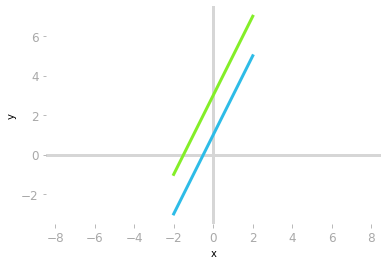

In [5]:
# create x and y vectors 
x = np.linspace (-2, 2, 100)
y = 2 *x + 1
y1 = 2 *x + 3

plt.plot(x, y)
plt.plot(x, y1)

#[...] Add axes, styles...
# Assure that ticks are displayed with a specific step 
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes 
plt.axhline(0, c='#d6d6d6', zorder = 0)
plt.axvline(0, c='#d6d6d6', zorder = 0)

# assure x and y axis have the same scale 
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Parallel equation lines. 

There is no point that is on both the blue and green lines. This means that this system of equations has no solution. 

You can also understand graphically why there is no solution through the column picture. Let's write the systems of equations as follows: 
$$
\begin{cases}
y - 2x = 1\\\\
y - 2x = 3
\end{cases}
$$
Writing it as a linear combination of column vectors, you have:

$$
y \begin{bmatrix}
    1 \\\\
    1
\end{bmatrix} +
x \begin{bmatrix}
    2 \\\\
    2
\end{bmatrix} =
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$
The column vectors of the system. You can see that it is impossible to reach the endpoint of the green vector by combining the blue and the red vectors. The reason is that these vectors are linearly dependent. The vector to reach is outside of the span of the vectors you combine.

##### Example 2. Infinite Number of Solutions
You can encounter another situation where the system has an infinite number of solutions. Let's consider the following systems: 
$$
\begin{cases}
y = 2x + 1\\\\
2y = 4x + 2
\end{cases}
$$

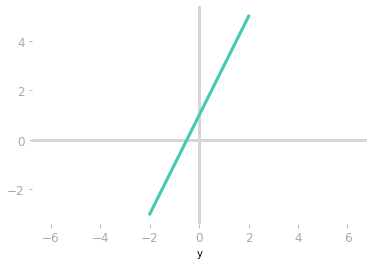

In [6]:
# create x and y vectors 
x = np.linspace(-2, 2, 100)
y = 2*x + 1
y1 = (4*x + 2)/2

plt.plot(x, y)
plt.plot(x, y1, alpha=0.3)
#[...] Add axes, styles...

# Assure that ticks are displayed with a specific step 
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes 
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')
plt.xlabel('x')
plt.xlabel('y')
plt.show()

The equation lines are overlapping.

Since the equations are the same, an infinite number of points are on both lines and thus, there is an infinite number of solutions for this system of linear equations. This is for instance similar to the case with a single equaiton and two variables. 

From the column picture perspective, you have: 
$$
\begin{cases}
y - 2x = 1\\\\
2y - 4x = 2
\end{cases}
$$
and with the vector notation:

$$
y \begin{bmatrix}
    1 \\\\
    2
\end{bmatrix} +
x \begin{bmatrix}
    2 \\\\
    4
\end{bmatrix} =
\begin{bmatrix}
    1 \\\\
    2
\end{bmatrix}
$$
The corresponding vectors graphically represented. You can see that there is an infinite number of ways to reach the endpoint of the green vector with combinations of the blue and red vectors.

Since both vectors go in the same direction, there is an infinite number of linear combinations allowing you to reach the right-hand side vector.

##### Summary
To summarize, you can have three possible situations, shown with two equations and two variables. 

It is impossible to have two lines crossing more than once and less than an infinite number of times. 

The principle holds for more dimensions. For instance, with three planes in $setR^3$, at least two can be parallel (no solution), the three can intersect (one solution), or the three can be superposed (infinite number of solutions). 

#### 3.1.4 Representation of Linear Equations with Matrices

Now that you can write vector equations using the column picture, you can go further and use a matrix to store the column vectors. 

Let's take again the following linear system: 
$$
y \begin{bmatrix}
    1 \\\\
    1
\end{bmatrix} + x \begin{bmatrix}
    -2 \\\\
    0.5
\end{bmatrix} = \begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$
You can write linear combinations as a matrix-vector product. The matrix corresponds to the two column vectors from the left-hand side concatenated:

$$
\begin{bmatrix}
    1  -2 \\\\
    1  0.5
\end{bmatrix}
$$
And the vector corresponds to the coefficients weighting the column vectors of the matrix (here, $x$ and $y$):

$$
\begin{bmatrix}
    y \\\\
    x
\end{bmatrix}
$$
Your linear system becomes the following matrix equation:

$$
\begin{bmatrix}
    1  -2 \\\\
    1  0.5
\end{bmatrix}
\begin{bmatrix}
    y \\\\
    x
\end{bmatrix}
= \begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$

##### Notation
This leads to the following notation widely used to write linear systems: 
$$
mA vx = vb
$$
with $mA$ the matrix containing the column vectors, $vx$ the vector of coefficients and $vb$ the resulting vector, that we'll call the target vector. It allows you to go from calculus, where equations are considered separately, to lienar algebra, where every piece of the linear system are represented as vectors and matrices. This abstraction is very powerful and brings vector space theory to solve systems of linear equations. 

With the column picture, you want to find the coefficients of the linear combination of the column vectors on the left-hand side of the equation. The solution exists only if the target vector is within their span. 

### 4.2 System Shape
Now that you can represent linear systems of equations as matrix equations, you'll be able to leverage what you learn about matrices in this context. 

The properties of the matrix $mA$ in the system $mA vx=vb$ gives some information about the system and the number of solutions depends of the shape of $mA$.

#### 4.2.1 Overdetermined Systems of Equations
If $mA$ has more rows than columns, the system has more equations than unknowns. It is called an overdetermined system. The consequences is that there is often no soltuion to such systems. 

To see why, let's consider the case of a matrix $mA$ of shape (3,2). With the row picture, you have three equations and two unknowns. There is no solution because the three lines will generally not intersect in a common points. 

An overdetermined system with two unknowns and three equations. There is usually no solution. 

Let's take another example: a matrix $mA$ with a shape (4,3). The row picture shows four planes in three dimensions. 

You can see by looking at the plane intersections that there is no point at the intersection of all planes. This means that there is no solution in this system of linear equations. 

The principle is the same for a larger number of dimensions.

#### 4.2.2 Underdetermined Systems of Equations

When the system has fewer equations than unknowns ($mA$ has less rows than columns) it is called underdetermined. In this case, there is often an infinite number of solutions. In some particular cases, an underdetermined system can have no solution. 

Let's take the following system as an example: 
$$
y = -3x - 4
$$

There is a single equation and two unknowns, so the system is underdetermined. Since there is only one equation, all points on the line is a solution, there is an infinite number of points on the line, so there is an infinite number of solutions. 

Let's take another example: 
$$
\begin{cases}
z = -2x + 3y + 5\\\\
z = 4x + y + 2
\end{cases}
$$
In this system, there are two equations and three unknowns: it is underdetermined.

Let's set another example showing a particular case of an underdetermined system of equations: 
$$
\begin{cases}
z = x + y\\\\
z = x + y + 10
\end{cases}
$$

You can see that the two planes are parallel: there is no point at the intersection of these two planesm abd thus, the system has no solution. 

Even if overdetermined systems has often no solution and underdetermined systems have an infinite number of solutions, there are special situations where this is not the case. 

### 4.3  Projections
You saw how to express a system of linear equations with the form $mAvx$ = $vb$. However, how can you find a solution or approximate a solution when none exists? The matrix form of the system of equations sometimes allows you to express the solution using the inverse of the matrix $mA$. 

You will see that there is a solution if the target vector is in the column space of $mA$. If it is not the case, you need to project the target vector to the column space to approximate a solution. 

You will learn how to do these projection and it will lead you to understand a major equation in machine learning and data science: the normal equation. 

#### 4.3.1 Solving Systems of Equations

Finding the inverse of a matrix allows you to solve systems of linear equations. As you learned, the multiplication of a matrix iwth its inverse gives the identity matrix (mAmI = mA). Since a matrix multiplied by its inverse gives you the identity matrix ($mA^{-1} mA = mI$), you can use the inverse to isolate an element in a matrix equation. If the matrix $mA$ has an inverse, you can multiply each side of the linear system by $mA-1$: 
$$
\begin{aligned}
mA vx = vb \\\\
mA^{-1}mA vx = mA^{-1}vb \\\\
vx = mA^{-1}vb
\end{aligned}
$$


This is like with standard equations where you multiply or divide each side to isolate the variable you're interested in. However, be careful and remember that, with matrices and vectors, the order of the multiplication matters. 

In the matrix equation, you know $mA$ and $vb$ and you want to find $vx$. If $mA$ has an inverse, the equation is solved. 

The matrix $mA$ gives information about the system of equations. For instance, if $mA$ is invertible (its inverse exists), you know that the set of equations has one and only one solution. In addition, a square matrix $mA$ is singular if and only if its determinant is equal to zero, so if $mA$ has a non-zero determinant, the system of linear equations has a single solution. 

#### 4.3.2 Projections to Approximate Unsolvable Systems 
A linear system $mA vx=vb$ is solvable only if the target vector $vb$ is included in the column space of $mA$ (the space corresponding to all possible linear combinations of the column vectors of the matrix. Solving the system $mA vx=vb$ means finding a linear combination of the columns of $mA$ equal to $vb$, the solution being $vx$.

However, some sets of linear equations have no solution. This is often the case with overdetermined system of equations, where the matrix $mA$ has more rows than column $(m>n)$. 

Let's take an example with the following set of equations: 
$$
\begin{cases}
y = 2x + 1 \\\\
y = x - 0.5 \\\\
y = -2x
\end{cases}
$$

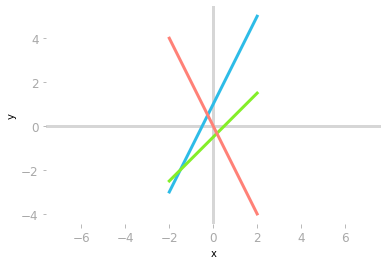

In [8]:
# create x and y vectors
x = np.linspace(-2, 2, 100)
y = 2 * x + 1
y1 =  x - 0.5
y2 = -2 * x

plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
# [...] Add axes, styles etc.

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Row picture of a unsolvable system of equations

The three lines do not intersect in a common point. Writing the system with all variables on the left-hand side, you have: 
$$
\begin{cases}
-2x + y = 1 \\\\
-x + y = 0.5 \\\\
2x + y = 0
\end{cases}
$$

The matrix form is $mAvx$ = $vb$, with the following $mA, vx$ and $vb$:
$$
\begin{aligned}
mA vx &= vb \\\\
\begin{bmatrix}
    -2  1 \\\\
    -1  1 \\\\
    2  1
\end{bmatrix}
\begin{bmatrix}
    x \\\\
    y
\end{bmatrix}
= \begin{bmatrix}
    1 \\\\
    0.5 \\\\
    0
\end{bmatrix}
\end{aligned}
$$

Note that we used the letter x and y because we represented the equations in a Cartesian plane: the vector $vx$ contains both values x and y.

Let's represent the column vectors of $mA$ as geometric vectors. They are: 
$$
\begin{bmatrix}
    -2 \\\\
    -1 \\\\
    2
\end{bmatrix}
$$
and

$$
\begin{bmatrix}
    1 \\\\
    1 \\\\
    1
\end{bmatrix}
$$
We’ll also visualize their span: the space containing all points reachable by linear combination of these two vectors. This space is the column space of $mA$.

Finally, let’s represent the vector $vb$ corresponding to the position you want to reach, which is defined as:

$$
\begin{bmatrix}
    1 \\\\
    0.5 \\\\
    0
\end{bmatrix}
$$

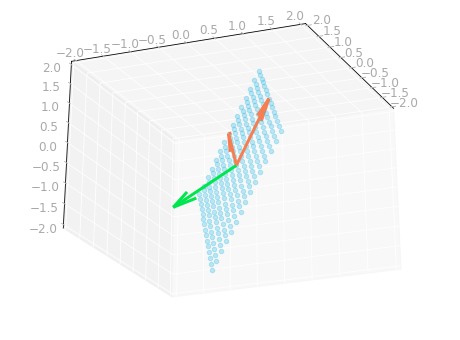

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

v1 = np.array([-2, -1, 2])
v2 = np.array([1, 1, 1])
v3 = np.array([0.3, -1, -1])

x = np.linspace(-1, 1, 15)
y = np.linspace(-1, 1, 15)

X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(Y.shape[1]):
        z = x[i] * v1 + y[j] * v2
        ax.scatter(z[0], z[1], z[2], c='#2EBCE7', alpha=0.3)
    
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color="#F57F53")
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color="#F57F53")
ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], color="#00E64E")

ax.view_init(elev=-27, azim=23)

ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)
plt.show()

The target vector (green) is outside of the span of the column space (red). 

The target vector you want to reach (in green) is outside of the column space (the blue plane, corresponding to the span of the column vectors of $mA$ represented in red). This shows that you can't reach the green vector by linear combinations of the red vectors. 

However, you might want to approximate a solution when a true solution doesn't exist. A good candidate is the nearest point to the target vector which is into the plane. This is the green vector projected onto the column space of $mA$. 

Let's see how projection works by looking at how you can project onto a line, and then onto a plane.

#### 4.3.3 Projections Onto a Line 

Let's see how to project a vector onto a line.

Projection onto a line: the vector $vp$ is the projection of the vector $vb$ onto the line passing by the vector $va$. 

The projection line is perpendicular to the vector $va$ onto which you project. This projection is called orthogonal projection. 

First, you can see that the projection vector going from $vb$ to the line passing by $va$ is defined as $vb-vp$ (the gray solid vector in the figure, the starting point of the vector doesn't matter). 


Furthermore, the vector $vp$ is a scaled version of the vector $va$. Mathematically, you can write: 
$$
vp = \hat{x}va
$$
with $\hat{x}$ (pronounced “x hat”) the unknown value scaling the vector $va$ to reach the projection. You thus want to find $hat{x}$ from $va$ and $vb$. Since the vectors $va$ and $vb - vp$ are orthogonal, you have:

$$
va \cdot (vb - vp) = 0
$$
Replacing $vp$, you have:

$$
\begin{aligned}
va \cdot (vb - \hat{x}va) &amp;= 0 \\\\
va \cdot vb - va \cdot \hat{x}va &amp;= 0 \\\\
-va \cdot \hat{x}va = - va \cdot vb \\\\
va \cdot \hat{x}va = va \cdot vb \\\\
\hat{x} = \frac{va \cdot vb}{va \cdot va}
\end{aligned}
$$
You have a way to calculate $\hat{x}$. If you use this value to rescale the vector $va$, you’ll get the projection vector $vp$. So, you can write:

$$
vp = \hat{x}va = \frac{va \cdot vb}{va \cdot va}va
$$
This formula allows you to calculate the projection of a vector onto another.

##### Example: 
Let's have the vector 
$$
va = \begin{bmatrix}
    3 \\\\
    1
\end{bmatrix}
$$
and

$$
vb = \begin{bmatrix}
    1 \\\\
    2
\end{bmatrix}
$$
You’ll project the vector $vb$ onto the vector $va$. Plotting these vectors you have:

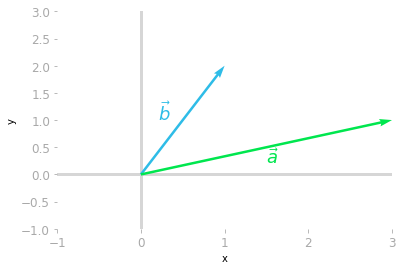

In [5]:
# Assure that ticks are displayed with a specific step 
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.quiver(0, 0, 1, 2, color='#2EBCE7', angles='xy', scale_units='xy', scale=1)
plt.text(0.2, 1, r'$\vec{b}$', color='#2EBCE7', size=18)

ax.quiver(0, 0, 3, 1, color='#00E64E', angles='xy', scale_units='xy', scale=1)
plt.text(1.5, 0.2, r'$\vec{a}$', color='#00E64E',size=18)
#[...] Add axes etc. 

# draw axes.
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Representation of the vectors $va$ and $vb$.

The projection is $p = \hat{x}va = \frac{va \cdot vb}{va \cdot va}va$, so you have:

$$
\begin{aligned}
\frac{va \cdot vb}{va \cdot va}va =
\frac{\begin{bmatrix}
    3 \\\\
    1
\end{bmatrix} \cdot
\begin{bmatrix}
    1 \\\\
    2
\end{bmatrix}}{\begin{bmatrix}
    3 \\\\
    1
\end{bmatrix} \cdot
\begin{bmatrix}
    3 \\\\
    1
\end{bmatrix}}
\begin{bmatrix}
    3 \\\\
    1
\end{bmatrix} \\\\
=
\frac{5}{10}
\begin{bmatrix}
    3 \\\\
    1
\end{bmatrix} \\\\
=
\begin{bmatrix}
    1.5 \\\\
    0.5
\end{bmatrix}
\end{aligned}
$$
Let’s plot the projection.

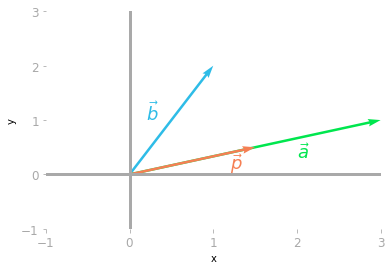

In [5]:
# Assure that ticks are displayed with a step equal to 1
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

ax.quiver(0, 0, 1, 2, color="#2EBCE7", angles='xy', scale_units='xy', scale=1)
plt.text(0.2, 1, r'$\vec{b}$', color="#2EBCE7", size=18)

ax.quiver(0, 0, 3, 1, color="#00E64E", angles='xy', scale_units='xy', scale=1)
plt.text(2, 0.3, r'$\vec{a}$', color="#00E64E", size=18)

ax.quiver(0, 0, 1.5, 0.5, color="#F57F53", angles='xy', scale_units='xy', scale=1)
plt.text(1.2, 0.1, r'$\vec{p}$', color="#F57F53", size=18)
# [...] Add axes etc.

# draw axes
plt.axhline(0, c='#A9A9A9')
plt.axvline(0, c='#A9A9A9')

plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The vector $vp$ is the projection of the vector $vb$ onto the vector $va$. 

The vector $vp$ is the projection of the vector $vb$ onto the line corresponding to the vector $va$.

#### 4.3.4 Projections Onto a Plane

To approximate a solution for a system of equations, you can calculate the projection $vp$ of the vector $vb$ onto the plane corresponding to the column space of the matrix $mA$. You then solve the new equation $mA \hat{vx}=vp$ which has a solution.
 
The projection vector $vp$ is in the column space. 

You can reach the projection (the purple dot) with linear combinations of the column vectors (in read). 

Let's start from the vector $vp$. Mathematically, it is a linear combination of the column vectors of $mA$: 
$$
vp = \hat{x}_1 va_1 + \cdots + \hat{x}_n va_n = mA\hat{vx}
$$
with $n$ being the number of columns of $mA$, $a_1$ the first column vector, $a_n$ the $n$th column vector, $\hat{x}_1$ the value scaling the first column vector, and $\hat{x}_n$ the value scaling the $n$th column vector.

with n being the number of columns of $mA$, $a1$ the first column vector, $an$ the $nth$ column vector,  $\hat{x}_1$ the value scaling the first column vector, and $\hat{x}_n$ the value scaling the $n$th column vector.

Calculating the projection onto a plane is very similar to the projection onto a line. You also want to find $\hat{vx}$ (which is a vector of weights instead of a scalar) such as the vector $vp$ is the closest vector to $vb$ belonging to the column space. The vector from $vb$ to $vp$ (in gray) is perpendicular to the plane.

This means that the dot product between this line and the plane is zero: $vb - vp$ is perpendicular to every vectors $va_1$ to $va_n$:

$$
\begin{cases}
va_1 \cdot (vb - vp) = 0 \\\\
\vdots \\\\
va_n \cdot (vb - vp) = 0
\end{cases}
$$
The vectors $va_1$ to $va_n$ are the column vectors from $mA$. You can write the equations as matrix product (you need to transpose the vectors $va_1$ to $va_n$ to have a working matrix product):

$$
\begin{bmatrix}
    \va_1^{\text{T}} \\\\
    \vdots \\\\
    \va_n^{\text{T}}
\end{bmatrix}
\begin{bmatrix}
    vb - vp
\end{bmatrix} =
\begin{bmatrix}
    0
\end{bmatrix}
$$
The matrix containing the vectors $va_1$ to $va_n$ can be written as:

$$
\begin{bmatrix}
    \va_1^{\text{T}} \\\\
    \vdots \\\\
    \va_n^{\text{T}}
\end{bmatrix} = \begin{bmatrix}
    va_1  \cdots  va_n
\end{bmatrix}^{\text{T}} = mA^{\text{T}}
$$
So you have:

$$
mA^{\text{T}} (vb-vp) = 0
$$
and since $p=mA \hat{vx}$, you can replace and write:

$$
\begin{aligned}
mA^{\text{T}} (vb-mA\hat{vx}) = 0 \\\\
mA^{\text{T}}vb - mA^{\text{T}}mA\hat{vx} = 0
\end{aligned}
$$
This leads to the famous equation called the normal equation:

$$
mA^{\text{T}}mA\hat{vx} = mA^{\text{T}}vb
$$
The advantage of this equation in comparison to $mA vx = vb$ is that, if the column vectors of the matrix $mA$ are independent, then $mA^{\text{T}}mA$ is invertible. Thus, you can get $\hat{vx}$ by multiplying both sides with the inverse of $mA^{\text{T}}mA$: this leads to cancel $mA^{\text{T}}mA$, allowing you to find $\hat{vx}$:

$$
\begin{aligned}
mA^{\text{T}}mA\hat{vx} = mA^{\text{T}}vb \\\\
(mA^{\text{T}}mA)^{-1}mA^{\text{T}}mA\hat{vx} = (mA^{\text{T}}mA)^{-1}mA^{\text{T}}vb \\\\
\hat{vx} = (mA^{\text{T}}mA)^{-1}mA^{\text{T}}vb
\end{aligned}
$$
You can use this method to approximate a solution when a system of linear equations has no solution, which is the case for almost all overdetermined systems.

You saw that understanding the column picture of systems of linear equations allows you to write these systems under the matrix form. Then, you saw that you can use projections to approximate a solution to unsolvable systems.

### 4.4 Hands-on Project: Linear Regression Using Least Squares Approximation
You can use least square approximation to find a line fitting data points. In this hands-on project, you'll learn how to go from data to a matrix equation, which will allow you to use linear algebra on your data and approximate a solution for linear regression problems.

#### 4.4.1 Linear Regression Using the Normal Equation
The normal equation is an equation used to find an analytical solution for linear regression, as an alterntive to gradient descent.

Let's say that you have 2D data on which you want to fit a line. The goal is to find the parameters of this best-fitting line. Let's call the slope $\theta_0$ (pronounced “theta zero”), and the $y$-intercept $\theta_1$ (pronounced “theta one”).

In this first part, you’ll take only a few data points to easily understand how you can convert a data problem into a linear algebra equation.

Take the following three two-dimensional data points:

A: (0, 0)
B: (1, 2)
C: (2, 1)
Let’s plot these data points. You have a $x$ vector with the values 0, 1 and 2, and a $y$-vector with the values 0, 2 and 0.

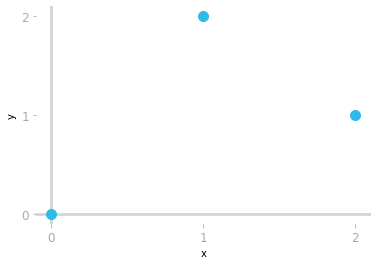

In [8]:
x = np.array([0, 1, 2])
y = np.array([0, 2, 1])
plt.scatter(x, y)
#[...] Add axes, styles etc.

# Assure that ticks are displayed with a step equal to 1.
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# draw axes 
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Figure 154: Scatter plot of the example data points.

The goal is to find the line passing by these data points. The equation of this line is: 
$$
vy=\theta_0 vx + theta_1
$$
The first step is to understand how this problem is related to systems of linear equations.

Start with an hypothetical perfect solution: let’s say that there is a line passing by all the data points (even if it is not possible). In this case, the first data sample is on the line, meaning that the $x$ and $y$ values of this data point (which are 0 and 0) satisfy the equation of your line $vy=\theta_0 vx + \theta_1 vb$.

Replacing these values in the equation, you have:
$$
\begin{aligned}
0 = \theta_0 \cdot 0 + \theta_1
\end{aligned}
$$
If you proceed identically with the second point, you have:

$$
2 = \theta_0 \cdot 1 + \theta_1
$$
and for the third point:

$$
1 = \theta_0 \cdot 2 + \theta_1
$$
With these equations, you have something that resembles a system of equations. You can see that the unknowns $\theta_0$ and $\theta_1$ are the parameters of the line. You can write the system as follows:

$$
\begin{cases}
0 = 0 \cdot \theta_0 + \theta_1 \\\\
2 = 1 \cdot \theta_0 + \theta_1 \\\\
1 = 2 \cdot \theta_0 + \theta_1
\end{cases}
$$
Or under the matrix form:

$$
\begin{bmatrix}
    0  1 \\\\
    1  1 \\\\
    2  1
\end{bmatrix}
\begin{bmatrix}
    \theta_0 \\\\
    \theta_1
\end{bmatrix}
= \begin{bmatrix}
    0 \\\\
    2 \\\\
    1
\end{bmatrix}
$$
Note that you need to add a column of 1 to represent the $y$-intercept.

Also, remember that, since there is no line passing by all the data points, this system has no solution. You’ll need to find an approximation.

Let’s keep the notation $mAvx = vb$ with $A$ being the coefficients, $vx$ the unknowns ($\theta_0$ and $\theta_1$) and $vb$ the solution:

You have

$$
mA=\begin{bmatrix}
    0  1 \\\\
    1  1 \\\\
    2  1
\end{bmatrix}
$$$$
vx=\begin{bmatrix}
    \theta_0 \\\\
    \theta_1
\end{bmatrix}
$$
and

$$
vb=\begin{bmatrix}
    0 \\\\
    2 \\\\
    1
\end{bmatrix}
$$

Let's write mA and $vb$ in Numpy:

In [9]:
A = np.array([
    [0, 1],
    [1, 1],
    [2, 1],
])

b = np.array([
    [0],
    [2],
    [1],
])

You can now use the normal equation to approximate a solution. As you saw, you have:
$$
mA^{\text{T}}mA\hat{vx} = mA^{\text{T}}vb
$$
and thus:

$$
\hat{vx} = (mA^{\text{T}}mA)^{-1}mA^{\text{T}}vb
$$
The columns of $mA$ should be linearly independent, and thus $(mA^{\text{T}}mA)^{-1}$ should exist.

The expression $(mA^{\text{T}}mA)^{-1}mA^{\text{T}}$ is one way to calculate what is called the Moore-Penrose inverse, or pseudoinverse of the matrix $mA$. The pseudoinverse is a generalization of the inverse. It is denoted as $mA^+$.

In [10]:
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b
x_hat

array([[0.5],
       [0.5]])

This means that the best line has a slope of 0.5 and an intercept of 0.5. Let's plot this line along with the data points:

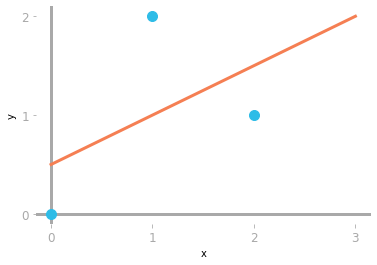

In [11]:
x = np.array([0, 1, 2])
y = np.array([0, 2, 1])

x1 = np.linspace(0, 3, 10)
y1 = 0.5 * x1 + 0.5

plt.scatter(x, y)
plt.plot(x1, y1, c='#F57F53')
#[...] Add axes, styles...

# Assure that ticks are displayed with a step equal to 1 
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# draw axes 
plt.axhline(0, c='#A9A9A9', zorder=0)
plt.axvline(0, c='#A9A9A9', zorder=0)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Regression line using the normal equation.

The line looks good. You just implemented a linear regression using the normal equation. 

This shows an example of how linear algebra concepts as independence, linear combinations, matrix product, column space, inverse of a matrix etc., can be used to deeply understand a very common method: linear regression using the normal equation. 

#### 4.4.2 Food Data
Now, that you saw how to go from data to matrix equations, let's use least squares approximation with real data: the CIQUAL dataset on food composition. 

You'll use the normal equation to model the relationship between the amount of phosphorus and zinc in vegetables and legumes. 

Let's start by loading the data:

In [17]:
data = pd.read_csv("data/ciqual.csv", sep=";", encoding="latin9", na_values=['-', 'NaN'])

Let's remove non-numeric characters in the data and convert the columns to numeric type.

In [19]:
data = data.replace("< ", "", regex=True).replace('traces', 0)
cols = data.loc[:, data.columns != 'alim_ssssgrp_nom_eng'].columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

Now, you'll select only part of the dataset you'll need for the linear regression. Then, remove the missing values:

In [21]:
food = ['vegetables. raw',
       'vegetables. cooked', 'vegetables. dried or dehydrated',
       'legumes. cooked', 'legumes. raw', 'legumes. dried',
       'fresh fruits']

data = data[['alim_ssssgrp_nom_eng', "Phosphorus (mg/100g)", "Zinc (mg/100g)"]]
data = data[(data['alim_ssssgrp_nom_eng'].isin(food))]

data = data.dropna()

data

,alim_ssssgrp_nom_eng,Phosphorus (mg/100g),Zinc (mg/100g)
308,vegetables. raw,44.4,0.460
309,vegetables. raw,10.0,0.070
310,vegetables. raw,32.7,0.220
311,vegetables. raw,85.6,0.650
312,vegetables. raw,37.5,0.610
...,...,...,...
659,fresh fruits,19.0,0.130
660,fresh fruits,17.0,0.080
661,fresh fruits,9.8,0.050
662,fresh fruits,15.8,0.086


Now let's visualize a scatter plot of the amount of zince as a function of the amount of phosphorus

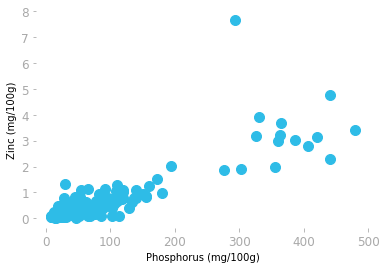

In [24]:
plt.scatter(data["Phosphorus (mg/100g)"], data["Zinc (mg/100g)"])
# [...] Add labels

plt.xlabel("Phosphorus (mg/100g)")
plt.ylabel("Zinc (mg/100g)")
plt.show()

Amount of zinc as a function of the amount of phosphorus.

You can then create the matrix and vectors corresponding to the equation $mA vx = vb$ (the function to_numpy() allows you to convert Pandas Series to Numpy arrays): 

In [25]:
x = data["Phosphorus (mg/100g)"].to_numpy()
b = data["Zinc (mg/100g)"].to_numpy()

A = np.array([x, np.ones(x.shape[0])]).T
A

array([[44.4,  1. ],
       [10. ,  1. ],
       [32.7,  1. ],
       ...,
       [ 9.8,  1. ],
       [15.8,  1. ],
       [32.6,  1. ]])

Now, use the normal equation to calculate $\hat{x}$:

In [26]:
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b
x_hat

array([ 0.0084948 , -0.05865873])

You can check that it works by plotting the regression line:

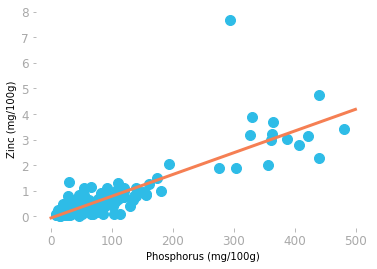

In [28]:
x_axis = np.arange(0, 500)
y_line = x_hat[0] * x_axis + x_hat[1]

plt.scatter(data["Phosphorus (mg/100g)"].to_numpy(), data["Zinc (mg/100g)"].to_numpy())
plt.plot(y_line, c="#F57F53")
# [...] Add labels

plt.xlabel("Phosphorus (mg/100g)")
plt.ylabel("Zinc (mg/100g)")
plt.show()           

Regression line representing the relationship between amount of zinc and phosphorus.

You can see that the line fits the data well.